# Labolatorium 1

Importowanie bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette("bright")

In [2]:
def matrix_2x2(a,b,c):
    return [[a[0]-c[0], a[1]-c[1]], [ b[0]-c[0], b[1]-c[1]]]

In [3]:
def matrix_3x3(a,b,c):
    return [[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]]

In [4]:
def det_2x2(a,b,c):
    matrix=matrix_2x2(a,b,c)
    return (matrix[0][0]*matrix[1][1])-(matrix[0][1]*matrix[1][0])
def det_3x3(a,b,c):
    matrix=matrix_3x3(a,b,c)
    one = (matrix[0][0]*matrix[1][1]*matrix[2][2])+(matrix[1][0]*matrix[2][1]*matrix[0][2])+(matrix[2][0]*matrix[0][1]*matrix[1][2])
    two = (matrix[0][2]*matrix[1][1]*matrix[2][0])+(matrix[0][1]*matrix[1][0]*matrix[2][2])+(matrix[0][0]*matrix[1][2]*matrix[2][1])
    return one-two


def det_2x2_np(a,b,c):
    matrix=matrix_2x2(a,b,c)
    return np.linalg.det(matrix)
def det_3x3_np(a,b,c):
    matrix=matrix_3x3(a,b,c)
    return np.linalg.det(matrix)

Dla punktów (a,b,c) jeżeli wyznacznik: <br>
<0 punkt C jest po prawej stronie prostej ab <br>
\>0 punkt C jest po lewej stronie prostej ab <br>
=0 punkt znajduje się na prostej ab

# Zadanie 1

1. Przygotuj następujące zbiory punktów (2D, współrzędne rzeczywiste typu double):<br>
a) 10 5 losowych punktów o współrzędnych z przedziału [-1000, 1000], <br>
b) 10 5 losowych punktów o współrzędnych z przedziału [-10 14 , 1014 ],
<br>
c) 1000 losowych punktów leżących na okręgu o środku (0,0) i promieniu R=100,<br>
d) 1000 losowych punktów o współrzędnych z przedziału [-1000, 1000] leżących na prostej 
wyznaczonej przez wektor (a, b),
przyjmij a = [-1.0, 0.0], b = [1.0, 0.1].

### Punkt a)

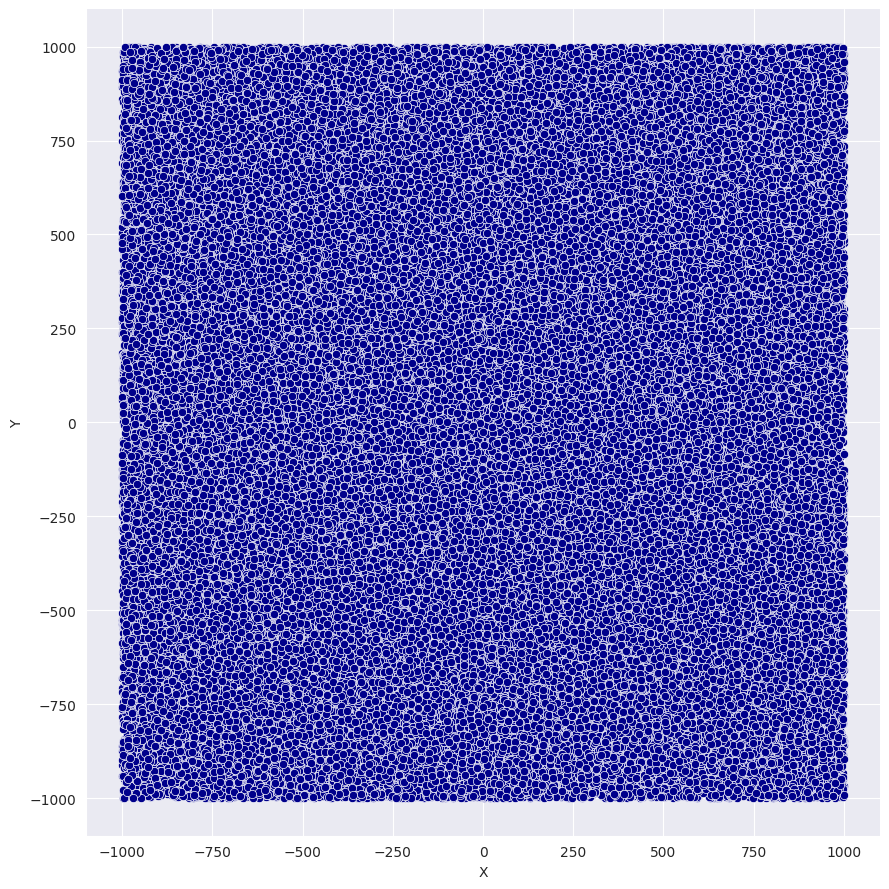

In [5]:
points_a = np.random.uniform(-1000, 1000, size =[10**5, 2])
table_a = pd.DataFrame(data=points_a, columns=['X', 'Y'])
plot_a =sns.relplot(data=table_a ,x='X', y='Y', height=9, color="darkblue")
plot_a.savefig("./plots/Zestaw_danych_a.png")

### Punkt b)

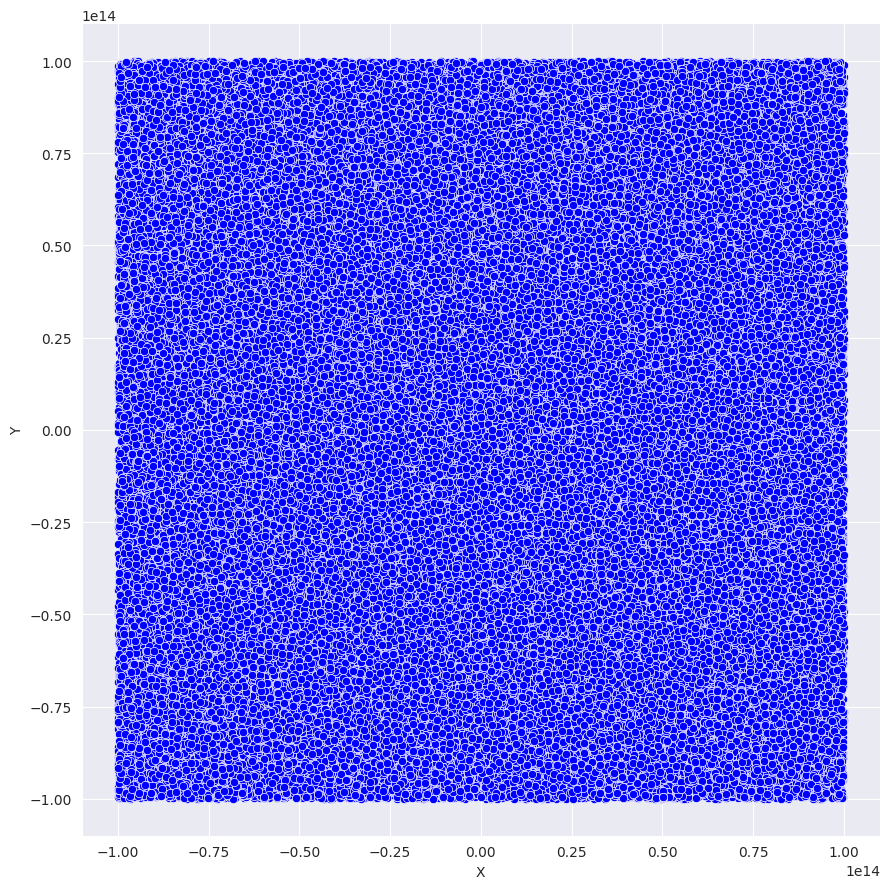

In [6]:
points_b = np.random.uniform(-(10)**14, 10**14, size =[10**5, 2])
table_b = pd.DataFrame(data=points_b, columns=['X', 'Y'])
plot_b =sns.relplot(data=table_b ,x='X', y='Y', height=9, color="blue")
plot_b.savefig("./plots/Zestaw_danych_b.png")

### Punkt c)

In [7]:
points_c=[None for _ in range(1000)]
for i in range(1000):
    angle=np.random.uniform(0,2*np.pi)
    x=np.cos(angle)*100
    y=np.sin(angle)*100
    points_c[i]=(x,y)
table_c=pd.DataFrame(data=points_c, columns=['X','Y'])

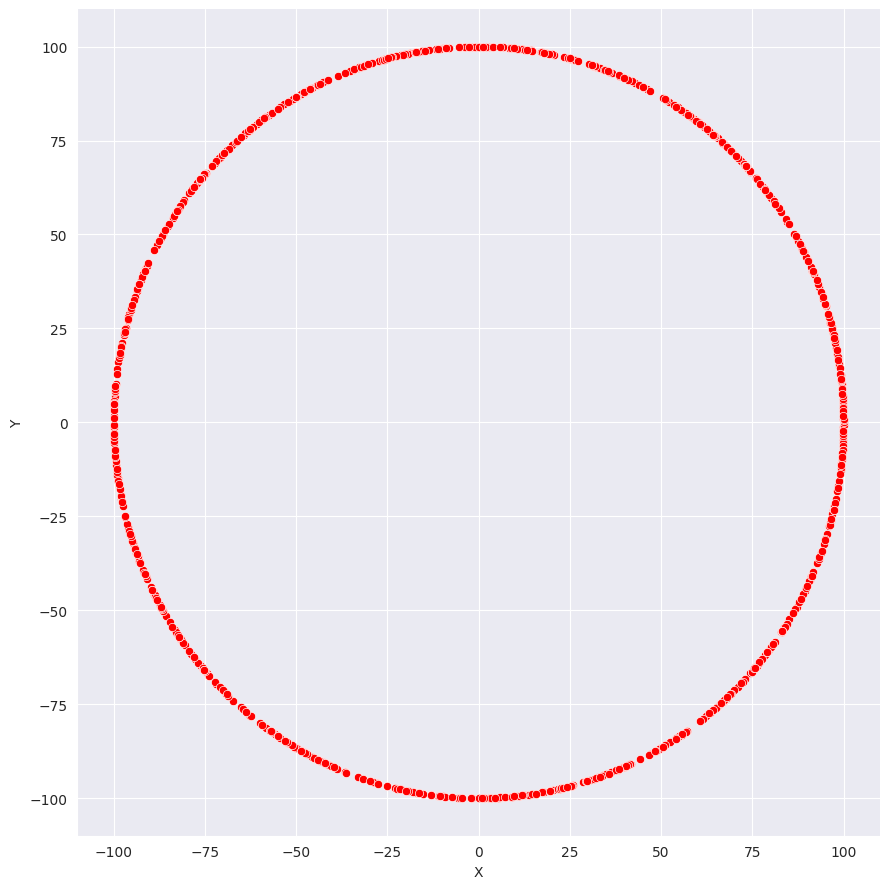

In [8]:
plot_c=sns.relplot(data=table_c, x='X', y='Y', height=9, color="red")
plot_c.savefig("./plots/Zestaw_danych_c.png")

### Punkt d)

In [9]:
points_d=[None for _ in range(1000)]
for i in range(1000):
    x=np.random.uniform(-1000,1000)
    y=0.05 * x + 0.05
    points_d[i]=(x,y)
table_d = pd.DataFrame( data=points_d, columns=['X','Y'])

In [10]:
temp = table_d['X'].loc[table_d.index[1]]

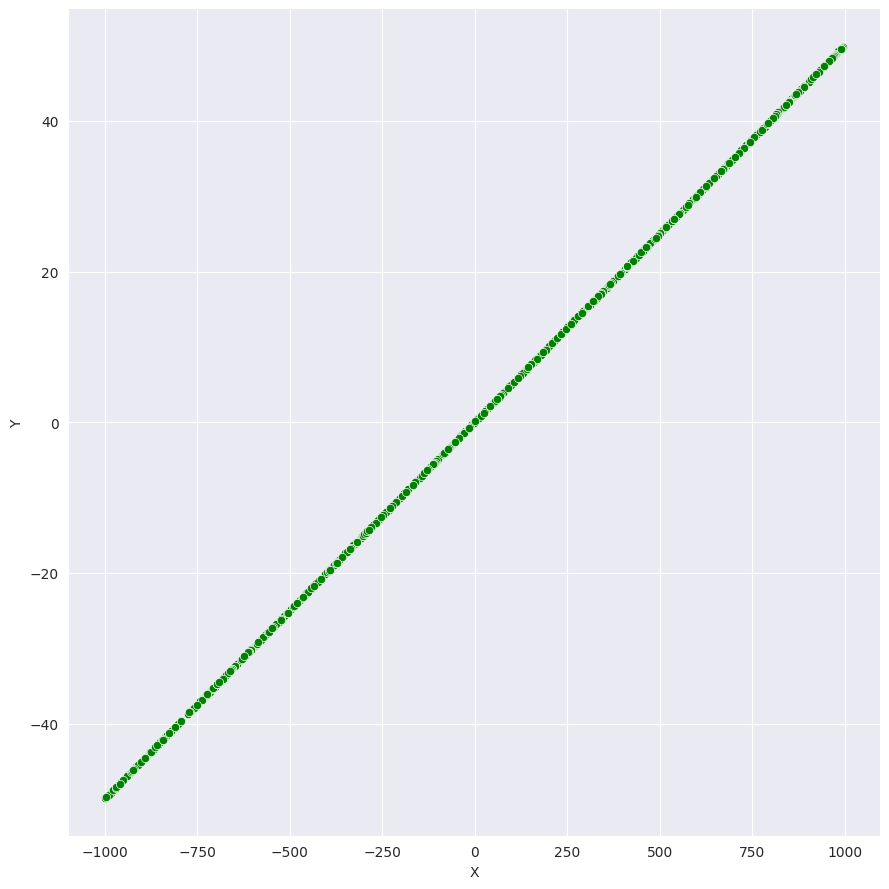

In [11]:
plot_d=sns.relplot(data=table_d, x='X', y='Y', height=9, color="green")
plot_d.savefig("./plots/Zestaw_danych_d.png")

# Zadanie 2

4. Przygotuj program, który dla każdego ze zbioru danych dokona podziału punktów względem ich
orientacji w stosunku do odcinka ab ( a = [-1.0, 0.0], b = [1.0, 0.1] – punkty znajdujące się po
lewej stronie, po prawej stronie oraz współliniowe. Obliczenia wykonaj przy pomocy
wyznacznika (1) i następnie (2) zaimplementowanego samodzielnie. Wyszukaj w bibliotekach
numerycznych procedury obliczania wyznacznika 3x3 i 2x2. Dla każdego zbioru danych
porównaj wyniki (podział punktów) uzyskane przy pomocy obu wyznaczników wyliczanych
procedurami własnymi i bibliotecznymi. Określ, ile punktów (i jakich) zostało inaczej
zakwalifikowanych dla różnych sposobów liczenia wyznacznika. Zbadaj wyniki dla różnej
tolerancji dla zera oraz różnych precyzji obliczeń. Odpowiednio zaprezentuj otrzymane wyniki
w tabelach.

In [22]:
epsilon=[10**(-12), 10**(-14), 10**(-20)]
determinant=[0,1,2,3]

In [25]:
def where_is_point(a,b,c,det,epsilon):
    if det==0:
        determinant=det_2x2(a,b,c)
    elif det==1:
        determinant=det_3x3(a,b,c)
    elif det==2:
        determinant=det_2x2_np(a,b,c)
    else:
        determinant=det_3x3_np(a,b,c)
        
    if determinant>epsilon:
        return "lewo"
    if determinant<-1*epsilon:
        return 'prawo'
    return 'środek'

In [24]:
def categorize(example,det,epsilon):
    a=(-1.0,0.0)
    b=(1.0,0.1)
    lenght = len(example.index)
    place=[None for _ in range(lenght)]
    for i in range(lenght):
        x=example['X'].loc[example.index[i]]
        y=example['Y'].loc[example.index[i]]
        place[i]=where_is_point(a,b,(x,y),det,epsilon)
    example["Położenie"]=place
    return example

In [15]:
for i in range(len(epsilon)):
    for det in determinant:
        data_a=categorize(table_a,det,epsilon[i])
        
        plot_a=sns.relplot(data=data_a, x='X', y='Y', hue="Miejsce", height=6)
        
        file_name="Dane_a" +"_e" + str(i) + "_d" + str(det) +".png"
        place="./plots/"
        plot_a.savefig(place+file_name)